In [1]:
pip install pyarango --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
>>> from pyArango.connection import *
>>> conn = Connection(username="root", password="")

In [4]:
>>> db = conn["Instacart"]
>>> db

ArangoDB database: Instacart

In [5]:
order = db["order"]

In [6]:
order

ArangoDB collection name: order, id: 11203, type: document, status: loaded

In [7]:
aql = "FOR x IN order RETURN x"
queryResult = db.AQLQuery(aql, rawResults=True, batchSize=10000)
for key in queryResult:
    print(key)

{'_key': '2539329', '_id': 'order/2539329', '_rev': '_hvM4QAm---', 'user_id': 1, 'eval_set': 'prior', 'order_number': 1, 'order_dow': 2, 'order_hour_of_day': 8}
{'_key': '2398795', '_id': 'order/2398795', '_rev': '_hvM4QAm--_', 'user_id': 1, 'eval_set': 'prior', 'order_number': 2, 'order_dow': 3, 'order_hour_of_day': 7, 'days_since_prior_order': 15}
{'_key': '473747', '_id': 'order/473747', '_rev': '_hvM4QAq---', 'user_id': 1, 'eval_set': 'prior', 'order_number': 3, 'order_dow': 3, 'order_hour_of_day': 12, 'days_since_prior_order': 21}
{'_key': '2254736', '_id': 'order/2254736', '_rev': '_hvM4QAq--_', 'user_id': 1, 'eval_set': 'prior', 'order_number': 4, 'order_dow': 4, 'order_hour_of_day': 7, 'days_since_prior_order': 29}
{'_key': '431534', '_id': 'order/431534', '_rev': '_hvM4QAq--A', 'user_id': 1, 'eval_set': 'prior', 'order_number': 5, 'order_dow': 4, 'order_hour_of_day': 15, 'days_since_prior_order': 28}
{'_key': '3367565', '_id': 'order/3367565', '_rev': '_hvM4QAq--B', 'user_id':

In [8]:
data = queryResult[1:10000]

In [9]:
data

[{'_key': '2398795',
  '_id': 'order/2398795',
  '_rev': '_hvM4QAm--_',
  'user_id': 1,
  'eval_set': 'prior',
  'order_number': 2,
  'order_dow': 3,
  'order_hour_of_day': 7,
  'days_since_prior_order': 15},
 {'_key': '473747',
  '_id': 'order/473747',
  '_rev': '_hvM4QAq---',
  'user_id': 1,
  'eval_set': 'prior',
  'order_number': 3,
  'order_dow': 3,
  'order_hour_of_day': 12,
  'days_since_prior_order': 21},
 {'_key': '2254736',
  '_id': 'order/2254736',
  '_rev': '_hvM4QAq--_',
  'user_id': 1,
  'eval_set': 'prior',
  'order_number': 4,
  'order_dow': 4,
  'order_hour_of_day': 7,
  'days_since_prior_order': 29},
 {'_key': '431534',
  '_id': 'order/431534',
  '_rev': '_hvM4QAq--A',
  'user_id': 1,
  'eval_set': 'prior',
  'order_number': 5,
  'order_dow': 4,
  'order_hour_of_day': 15,
  'days_since_prior_order': 28},
 {'_key': '3367565',
  '_id': 'order/3367565',
  '_rev': '_hvM4QAq--B',
  'user_id': 1,
  'eval_set': 'prior',
  'order_number': 6,
  'order_dow': 2,
  'order_hour_of

In [10]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df = pd.DataFrame(data)

In [12]:
df

,_key,_id,_rev,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2398795,order/2398795,_hvM4QAm--_,1,prior,2,3,7,15.0
1,473747,order/473747,_hvM4QAq---,1,prior,3,3,12,21.0
2,2254736,order/2254736,_hvM4QAq--_,1,prior,4,4,7,29.0
3,431534,order/431534,_hvM4QAq--A,1,prior,5,4,15,28.0
4,3367565,order/3367565,_hvM4QAq--B,1,prior,6,2,7,19.0
...,...,...,...,...,...,...,...,...,...
9994,2650063,order/2650063,_hvM4QO6--L,633,prior,1,3,12,NaN
9995,3051335,order/3051335,_hvM4QO6--M,633,prior,2,6,19,17.0
9996,1901440,order/1901440,_hvM4QO6--N,633,prior,3,1,9,30.0
9997,1624343,order/1624343,_hvM4QO6--O,633,prior,4,1,13,30.0


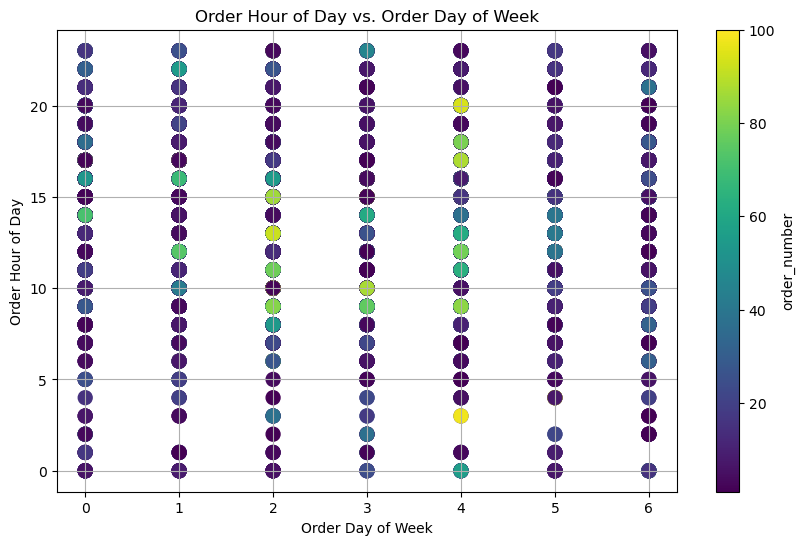

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['order_dow'], df['order_hour_of_day'], c=df['order_number'], cmap='viridis', s=100)
plt.colorbar(label='order_number')
plt.title('Order Hour of Day vs. Order Day of Week')
plt.xlabel('Order Day of Week')
plt.ylabel('Order Hour of Day')
plt.grid(True)
plt.show()

In [14]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [15]:
import squarify

In [16]:
# Group data by order day of week and sum the order numbers
sum_order_by_dow = df.groupby('order_dow')['order_number'].sum().reset_index(name='count')

print(sum_order_by_dow)

   order_dow  count
0          0  24330
1          1  29436
2          2  23022
3          3  21600
4          4  22787
5          5  23513
6          6  19095


In [17]:
sum_order_by_dow.index

RangeIndex(start=0, stop=7, step=1)

<Axes: title={'center': 'Order Day of Week Vs Total no of order'}>

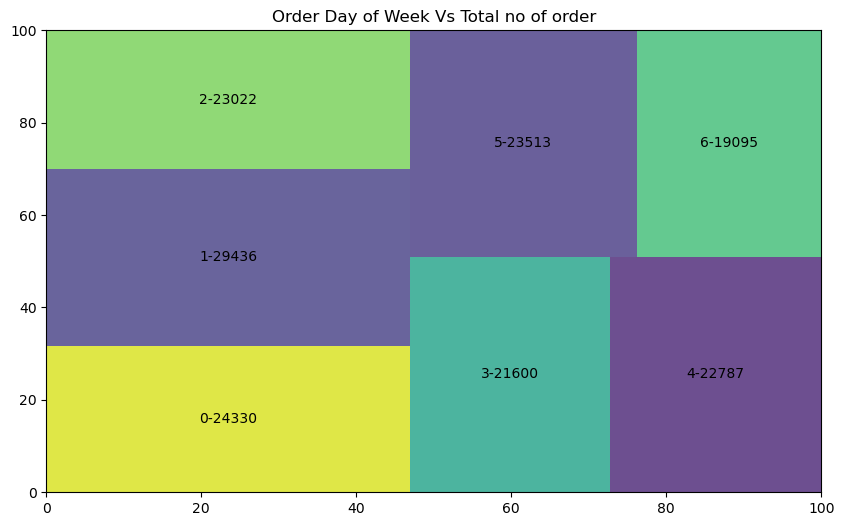

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
plt.title("Order Day of Week Vs Total no of order")
squarify.plot(sum_order_by_dow["count"], label=sum_order_by_dow.apply(lambda x: f"{x['order_dow']}-{x['count']}", axis=1), alpha=0.8)